# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

# Read Data

In [2]:
df = pd.read_csv('/content/drive/MyDrive/BitsExamples/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

# K Nearest Neighbor Classifier Example

In [5]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']
print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [6]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [7]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .3, random_state = 42, stratify = y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
neighbors = np.arange(1,15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))



In [ ]:
for i,k in enumerate(neighbors):
  knn = KNeighborsClassifier(n_neighbors=k)

  knn.fit(X_train, y_train)
  train_accuracy[i] = knn.score(X_train, y_train)
  test_accuracy[i]= knn.score(X_test, y_test)


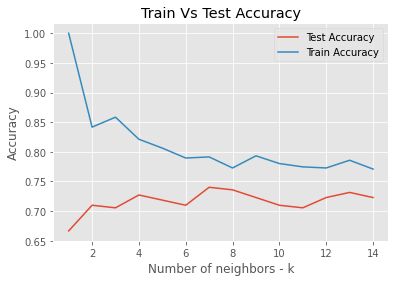

In [ ]:
plt.title('Train Vs Test Accuracy')
plt.plot(neighbors, test_accuracy, label = 'Test Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Train Accuracy')
plt.ylabel('Accuracy')
plt.legend()
plt.xlabel('Number of neighbors - k')
plt.show()

In [ ]:
## From the above graph it is evident that the gap between Test and Train is minimum /
# when 'k' is aroud 7.  Hence we would go with optimum value of k as 7 which is a better /
# value that looking at the elbow' point.



---



---



In [ ]:
knn = KNeighborsClassifier(n_neighbors= 7)
knn.fit(X_train, y_train )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
knn.score(X_test, y_test)

0.7402597402597403

In [ ]:
y_pred = knn.predict(X_test)
print(y_pred)

[0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0
 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1
 0 0 0 1 0 1 1 1 0]


In [ ]:
pd.crosstab(y_test, y_pred, rownames=['True)'], colnames= ['Predicted'], margins= True )

Predicted,0,1,All
True),,,
0,129,21,150
1,39,42,81
All,168,63,231


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       150
           1       0.67      0.52      0.58        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231



In [ ]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [ ]:
from sklearn.metrics import roc_curve

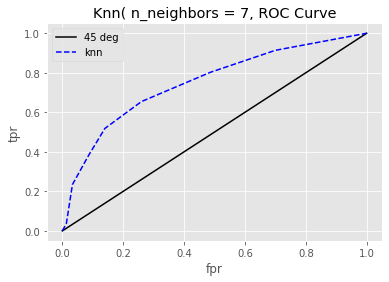

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1], [0,1], 'k-', label = '45 deg')
plt.plot(fpr, tpr, 'b--', label = 'knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend()
plt.title('Knn( n_neighbors = 7, ROC Curve')
plt.show()



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'n_neighbors': np.arange(1,50)}


In [ ]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv = 5 )
knn_cv.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
knn_cv.best_score_

NameError: ignored

In [ ]:
knn_cv.best_params_

{'n_neighbors': 14}

# Naive Bayes Classifier from scratch - without Libraries

In [ ]:
data = df.copy()  #Make a copy of original data

In [ ]:
labels = ['low', 'medium', 'high']

for j in data.columns[:-1]:
  mean = data[j].mean()
  data[j] = data[j].replace(0,mean)
  data[j] = pd.cut( data[j],bins = len(labels), labels = labels)

In [ ]:
def count(data, colname, label, target):
    condition = (data[colname] == label) & (data['Outcome'] == target)
    return len(data[condition])

In [ ]:
probabilities = {0: {}, 1:{}}


In [ ]:
#**********************************************
#Split Data
#**********************************************

train_percent = 70
train_len = int((train_percent*len(data))/100)

train_X = data.iloc[:train_len,:]
test_X = data.iloc[train_len+1:,:-1]
test_y = data.iloc[train_len+1:, -1]

#*********************************************************
# Prior
#*********************************************************
count_0 = count(train_X, 'Outcome', 0,0)
count_1 = count(train_X, 'Outcome', 1,1)

prob_0 = count_0/len(train_X)
prob_1 = count_1/len(train_X)
#*********************************************************


In [ ]:
print(prob_0, prob_1)

0.6480446927374302 0.35195530726256985


In [ ]:
#Calculate Likelihoo Probabilities

for col in train_X.columns[:-1]:
	probabilities[0][col] = {}
	probabilities[1][col] = {}

	for category in labels:
		count_ct_0 = count(train_X, col, category, 0)
		count_ct_1 = count(train_X, col, category, 1)

		probabilities[0][col][category] = count_ct_0/count_0
		probabilities[1][col][category] = count_ct_1/count_1

In [ ]:
print(type(probabilities))

<class 'dict'>


In [ ]:
#Test the model using NB on test data
predict = []
for row in range(0,len(test_X)):
	prod_0 = prob_0
	prod_1 = prob_1

	for feature in test_X.columns:
	  prod_0 *= probabilities[0][feature][test_X[feature].iloc[row]]
	  prod_1 *= probabilities[1][feature][test_X[feature].iloc[row]]

#predict the outcome
	if prod_0>prod_1:
	  predict.append(0)
	else:
	  predict.append(1)

# Create confusion netrics

tp, tn, fp, fn = 0,0,0,0
for j in range(0, len(predict)):
	if predict[j] ==0:
		if test_y.iloc[j] ==0:
			tp += 1
	else:
		if test_y.iloc[j] == 1:
			tn += 1
		else:
			fn += 1


In [ ]:
print('Accuracy for trainig length '+str(train_percent)+'% :',((tp+tn)/len(test_y))*100)

Accuracy for trainig length 70% : 80.0


# Naive Bayes Classifier - Using SKlearn Libraries

In [ ]:
data = df.copy()

zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']
X = data.drop('Outcome', axis = 1)
y = data['Outcome']


In [ ]:
for column in zero_not_accepted:
	X[column] = X[column].replace(0, np.NaN)
	mean = int(X[column].mean(skipna=True))
	X[column] = X[column].replace(np.NaN, mean)



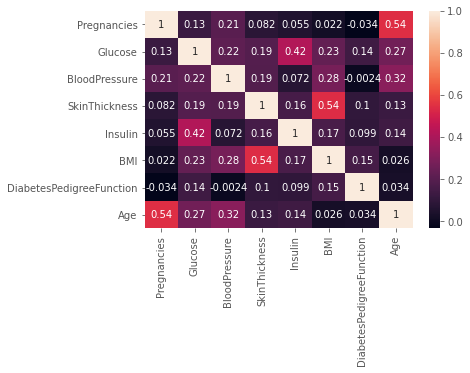

In [ ]:
import seaborn as sns
sns.heatmap(X.corr(), annot = True)
#One assumption of Naive Bayes classifier is that the attributes are independent of each other.
#Let's verify the same using correlation matrix.  

In [ ]:
#Age & Pregnancy has a correlation ie 0.54, 
#we can ignore.  If there is higher correlation, then we need to remove those 
#features before run Naive Bayes classification

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = .2)

# 

In [ ]:
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
clf = NB()

In [ ]:
clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f1_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


[[92 15]
 [18 29]]
0.6373626373626374
0.7857142857142857
